# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Exploring Data

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.duplicated().sum()

0

Tidak terdapat data duplikat

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Terdapat 75 kolom dan 466285 baris. 

# Labeling Target

In [6]:
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['loan_status'].unique()
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [8]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']), 0, 1)

In [9]:
df.drop(['loan_status'], axis=1, inplace = True)

# Feature Enginering

## term

In [10]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

Menghapus teks "months" dan mengkonversi dari string ke numerik

In [11]:
df['term'] = pd.to_numeric(df['term'].str.replace(' months', ''))

## emp_length

In [12]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Menghapus teks dan mengkonversi dari string ke numerik

In [13]:
df['emp_length'] = df['emp_length'].str.replace('\\+ years', '')
df['emp_length'] = df['emp_length'].str.replace('< 1 year', str(0))
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')

<ipython-input-13-baea8f149af0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length'] = df['emp_length'].str.replace('\\+ years', '')


In [14]:
type(df['emp_length'][0])
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [15]:
df[['emp_length']].head(5)

,emp_length
0,10.0
1,0.0
2,10.0
3,10.0
4,1.0


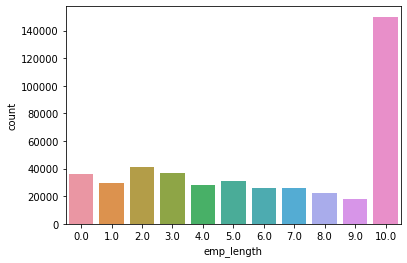

In [16]:
sns.countplot(data=df, x='emp_length')

## Issue_d

In [17]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['issue_d']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
466280   2014-01-01
466281   2014-01-01
466282   2014-01-01
466283   2014-01-01
466284   2014-01-01
Name: issue_d, Length: 466285, dtype: datetime64[ns]

In [18]:
# diasumsikan untuk tanggal sekarang adalah 2022-12-3
df['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2022-12-3')
 - df['issue_d'])/np.timedelta64(1, 'M') ))

In [19]:
df['mths_since_issue_d'].describe()

count    466285.000000
mean        111.255187
std          14.340154
min          96.000000
25%         101.000000
50%         107.000000
75%         117.000000
max         186.000000
Name: mths_since_issue_d, dtype: float64

In [20]:
df['mths_since_issue_d']

0         132.0
1         132.0
2         132.0
3         132.0
4         132.0
          ...  
466280    107.0
466281    107.0
466282    107.0
466283    107.0
466284    107.0
Name: mths_since_issue_d, Length: 466285, dtype: float64

In [21]:
df.drop(['issue_d'], axis=1, inplace=True)

## Earliest_cr_line

In [22]:
df['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [23]:
#Konversi dari object ke date time
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')

In [24]:
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2022-12-3') 
- df['earliest_cr_line'])/np.timedelta64(1, 'M') ))
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        299.482430
std          93.974829
min        -552.000000
25%         243.000000
50%         285.000000
75%         345.000000
max         647.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
df.loc[:, [ 'earliest_cr_line', 'mths_since_earliest_cr_line']][df['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,mths_since_earliest_cr_line
1580,2062-09-01,-477.0
1770,2068-09-01,-549.0
2799,2064-09-01,-501.0
3282,2067-09-01,-537.0
3359,2065-02-01,-506.0
...,...,...
464003,2068-01-01,-541.0
464260,2066-07-01,-523.0
465100,2067-10-01,-538.0
465500,2067-09-01,-537.0


Dari kolom 'earliest_cr_line' dapat kita lihat bahwa terdapat waktu/tahun melebihi dari waktu saat data dikumpulkan. Sehingga bernilai negatif.

In [26]:
df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line'] < 0] = df['mths_since_earliest_cr_line'].max() # menghapus data yang bernilai negatif
min(df['mths_since_earliest_cr_line'])

<ipython-input-26-d26235fd4a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line'] < 0] = df['mths_since_earliest_cr_line'].max() # menghapus data yang bernilai negatif


133.0

In [27]:
df['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        302.385374
std          86.460310
min         133.000000
25%         244.000000
50%         286.000000
75%         345.000000
max         647.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
df.drop(['earliest_cr_line'], axis=1, inplace=True)

## last_pymnt_d

In [29]:
df['last_pymnt_d']

0         Jan-15
1         Apr-13
2         Jun-14
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Dec-14
466282    Jan-16
466283    Dec-14
466284    Jan-16
Name: last_pymnt_d, Length: 466285, dtype: object

In [30]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format = '%b-%y')

In [31]:
df['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2022-12-3') - df['last_pymnt_d'])/np.timedelta64(1, 'M') ))
df['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         91.294369
std          12.809898
min          83.000000
25%          83.000000
50%          84.000000
75%          95.000000
max         180.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [32]:
df['mths_since_last_pymnt_d']

0          95.0
1         116.0
2         102.0
3          95.0
4          83.0
          ...  
466280     83.0
466281     96.0
466282     83.0
466283     96.0
466284     83.0
Name: mths_since_last_pymnt_d, Length: 466285, dtype: float64

In [33]:
df.drop(['last_pymnt_d'], axis=1, inplace=True)

## last_credit_pull_d

In [34]:
df['last_credit_pull_d']

0         Jan-16
1         Sep-13
2         Jan-16
3         Jan-15
4         Jan-16
           ...  
466280    Jan-16
466281    Jan-16
466282    Dec-15
466283    Apr-15
466284    Jan-16
Name: last_credit_pull_d, Length: 466285, dtype: object

In [35]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format = '%b-%y')

In [36]:
df['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2022-12-3') 
- df['last_credit_pull_d'])/np.timedelta64(1, 'M') ))
df['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         87.045588
std           9.636423
min          83.000000
25%          83.000000
50%          83.000000
75%          85.000000
max         187.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [37]:
df['mths_since_last_credit_pull_d']

0          83.0
1         111.0
2          83.0
3          95.0
4          83.0
          ...  
466280     83.0
466281     83.0
466282     84.0
466283     92.0
466284     83.0
Name: mths_since_last_credit_pull_d, Length: 466285, dtype: float64

In [38]:
df.drop(['last_credit_pull_d'], axis=1, inplace=True)

## Cek Outliers annual_inc

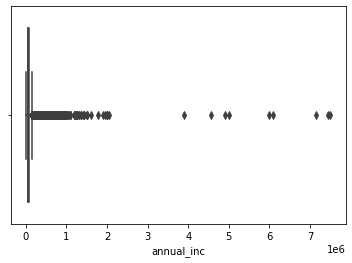

In [39]:
sns.boxplot(x='annual_inc', data=df)

terdapat outliers pada variable annual_inc

In [40]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["annual_inc"] >= low_limit) &
        (df["annual_inc"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 466285
Jumlah baris setelah memfilter outlier: 446382


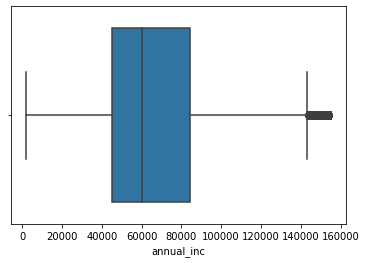

In [41]:
sns.boxplot(x='annual_inc', data=df)

## Cek outliers revol_bal

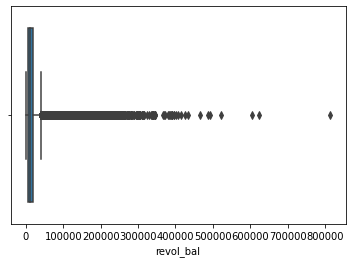

In [42]:
sns.boxplot(x='revol_bal', data=df)

Jumlah baris sebelum memfilter outlier: 446382
Jumlah baris setelah memfilter outlier: 426354


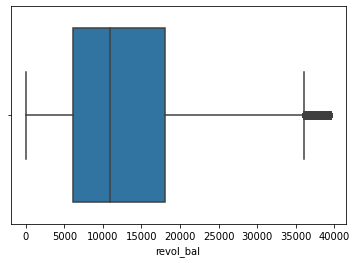

In [43]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['revol_bal'].quantile(0.25)
Q3 = df['revol_bal'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["revol_bal"] >= low_limit) &
        (df["revol_bal"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

sns.boxplot(x='revol_bal', data=df)

## Cek Outliers total_pymnt

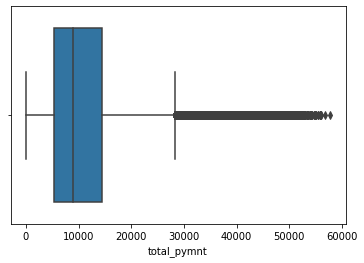

In [44]:
sns.boxplot(x='total_pymnt', data=df)

Jumlah baris sebelum memfilter outlier: 426354
Jumlah baris setelah memfilter outlier: 409400


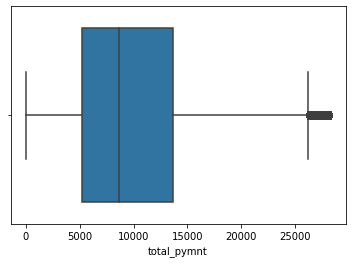

In [45]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['total_pymnt'].quantile(0.25)
Q3 = df['total_pymnt'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["total_pymnt"] >= low_limit) &
        (df["total_pymnt"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

sns.boxplot(x='total_pymnt', data=df)

## Cek Outliers total_rec_int

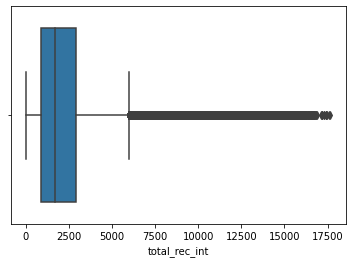

In [46]:
sns.boxplot(x='total_rec_int', data=df)

Jumlah baris sebelum memfilter outlier: 409400
Jumlah baris setelah memfilter outlier: 383761


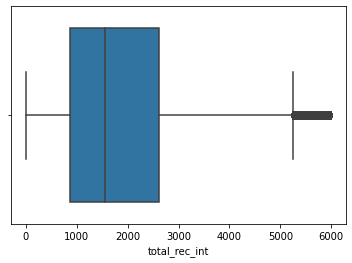

In [47]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['total_rec_int'].quantile(0.25)
Q3 = df['total_rec_int'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["total_rec_int"] >= low_limit) &
        (df["total_rec_int"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

sns.boxplot(x='total_rec_int', data=df)

## Cek Outliers tot_cur_bal

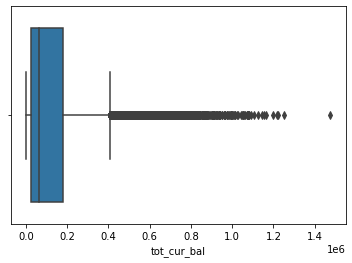

In [48]:
sns.boxplot(x='tot_cur_bal', data=df)

Jumlah baris sebelum memfilter outlier: 383761
Jumlah baris setelah memfilter outlier: 317038


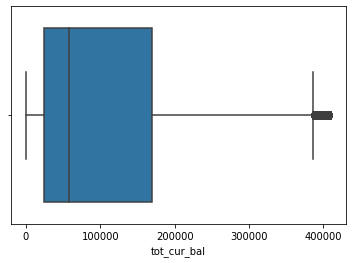

In [49]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['tot_cur_bal'].quantile(0.25)
Q3 = df['tot_cur_bal'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["tot_cur_bal"] >= low_limit) &
        (df["tot_cur_bal"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

sns.boxplot(x='tot_cur_bal', data=df)

## Cek Outliers total_rev_hi_lim

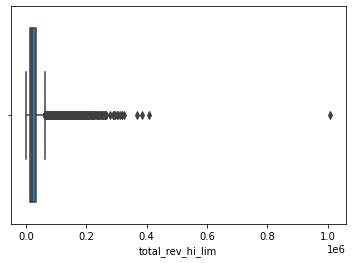

In [50]:
sns.boxplot(x='total_rev_hi_lim', data=df)

Jumlah baris sebelum memfilter outlier: 317038
Jumlah baris setelah memfilter outlier: 303593


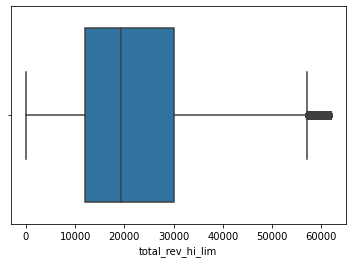

In [51]:
print('Jumlah baris sebelum memfilter outlier:', len(df))

Q1 = df['total_rev_hi_lim'].quantile(0.25)
Q3 = df['total_rev_hi_lim'].quantile(0.75)

IQR = Q3-Q1

low_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR

df = df[(df["total_rev_hi_lim"] >= low_limit) &
        (df["total_rev_hi_lim"] <= high_limit)
        ]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

sns.boxplot(x='total_rev_hi_lim', data=df)

# Feature Selection

In [52]:
# Mengecek data NULL

df.isnull().sum()

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
                                ... 
good_bad                           0
mths_since_issue_d                 0
mths_since_earliest_cr_line        0
mths_since_last_pymnt_d          233
mths_since_last_credit_pull_d     30
Length: 75, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303593 entries, 42535 to 466284
Data columns (total 75 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     303593 non-null  int64  
 1   id                             303593 non-null  int64  
 2   member_id                      303593 non-null  int64  
 3   loan_amnt                      303593 non-null  int64  
 4   funded_amnt                    303593 non-null  int64  
 5   funded_amnt_inv                303593 non-null  float64
 6   term                           303593 non-null  int64  
 7   int_rate                       303593 non-null  float64
 8   installment                    303593 non-null  float64
 9   grade                          303593 non-null  object 
 10  sub_grade                      303593 non-null  object 
 11  emp_title                      284674 non-null  object 
 12  emp_length                

In [54]:
# menghapus kolom dengan NULL banyak

df.drop(['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m','open_il_6m',
         'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 
         'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 
         'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
        ,axis=1, inplace=True)

In [55]:
# menghapus identitas, high cardinality, memiliki 1  nilai unik, free text, dan yang dominan
df.drop(['Unnamed: 0', 'id', 'member_id', 'sub_grade','url', 'desc', 'emp_title', 
         'title', 'zip_code', 'addr_state', 'pymnt_plan', 'next_pymnt_d', 'recoveries', 
         'collection_recovery_fee', 'total_rec_prncp', 
         'total_rec_late_fee', 'policy_code', 'application_type'], axis=1, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303593 entries, 42535 to 466284
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   loan_amnt                      303593 non-null  int64  
 1   funded_amnt                    303593 non-null  int64  
 2   funded_amnt_inv                303593 non-null  float64
 3   term                           303593 non-null  int64  
 4   int_rate                       303593 non-null  float64
 5   installment                    303593 non-null  float64
 6   grade                          303593 non-null  object 
 7   emp_length                     287401 non-null  float64
 8   home_ownership                 303593 non-null  object 
 9   annual_inc                     303593 non-null  float64
 10  verification_status            303593 non-null  object 
 11  purpose                        303593 non-null  object 
 12  dti                       

## Mengecek Korelasi

In [57]:
df_num = df.select_dtypes(include = 'number').copy()
df_num

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad,mths_since_issue_d,mths_since_earliest_cr_line,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
42535,27050,27050,27050.0,36,10.99,885.46,10.0,55000.0,22.87,0.0,...,0.0,0.0,0.0,114834.0,59900.0,1,108.0,434.0,83.0,84.0
42536,9750,9750,9750.0,36,13.98,333.14,1.0,26000.0,25.12,0.0,...,0.0,0.0,0.0,14123.0,15100.0,1,108.0,191.0,83.0,83.0
42537,12000,12000,12000.0,36,6.62,368.45,10.0,105000.0,14.05,0.0,...,0.0,0.0,0.0,267646.0,61100.0,1,108.0,345.0,83.0,83.0
42538,12000,12000,12000.0,36,13.53,407.40,10.0,40000.0,16.94,0.0,...,0.0,0.0,15386.0,13605.0,8100.0,1,108.0,290.0,87.0,83.0
42539,15000,15000,15000.0,36,8.90,476.30,2.0,63000.0,16.51,0.0,...,0.0,0.0,1514.0,272492.0,15400.0,1,108.0,297.0,83.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466278,10000,10000,10000.0,36,18.25,362.78,10.0,42000.0,11.57,0.0,...,0.0,0.0,0.0,10170.0,11100.0,1,107.0,246.0,87.0,83.0
466279,15000,15000,15000.0,36,13.53,509.25,4.0,66000.0,16.22,0.0,...,0.0,0.0,0.0,20140.0,17600.0,1,107.0,280.0,83.0,83.0
466280,18400,18400,18400.0,60,14.47,432.64,4.0,110000.0,19.85,0.0,...,0.0,0.0,0.0,294998.0,29900.0,1,107.0,236.0,83.0,83.0
466281,22000,22000,22000.0,60,19.97,582.50,10.0,78000.0,18.45,0.0,...,0.0,0.0,0.0,221830.0,39400.0,0,107.0,306.0,96.0,83.0


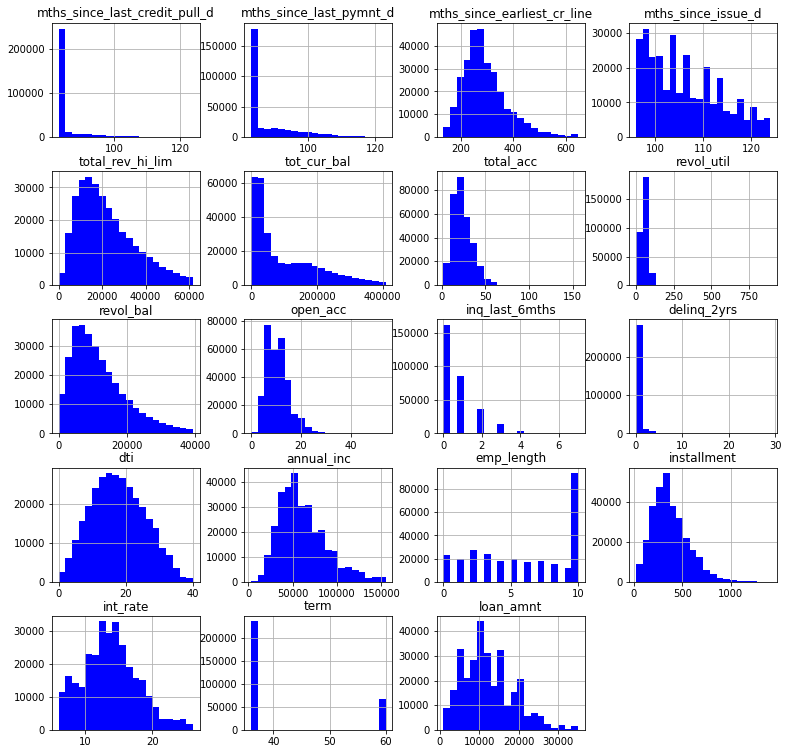

In [58]:
num_cols = ['mths_since_last_credit_pull_d', 'mths_since_last_pymnt_d', 'mths_since_earliest_cr_line', 'mths_since_issue_d', 'total_rev_hi_lim', 'tot_cur_bal', 'total_acc', 'revol_util', 'revol_bal', 'open_acc', 'inq_last_6mths', 'delinq_2yrs', 'dti', 'annual_inc', 'emp_length', 'installment', 'int_rate', 'term', 'loan_amnt']
df_num[num_cols].hist(bins=20, figsize=(13,13), color='blue')
plt.show()

In [59]:
# Numerikal 
num_corr = df_num.corr('spearman')
np.fill_diagonal(num_corr.values, np.nan)
num_corr_table = num_corr.unstack().sort_values(ascending = False).drop_duplicates().to_frame()
num_corr_table.columns = ['Correlation Coefficient']
num_corr_table.head(10)

,,Correlation Coefficient
loan_amnt,funded_amnt,1.000000
out_prncp,out_prncp_inv,1.000000
total_pymnt,total_pymnt_inv,0.999995
funded_amnt,funded_amnt_inv,0.999811
funded_amnt_inv,loan_amnt,0.999811
funded_amnt,installment,0.954986
loan_amnt,installment,0.954986
funded_amnt_inv,installment,0.954788
revol_bal,total_rev_hi_lim,0.754865
installment,total_pymnt_inv,0.747075


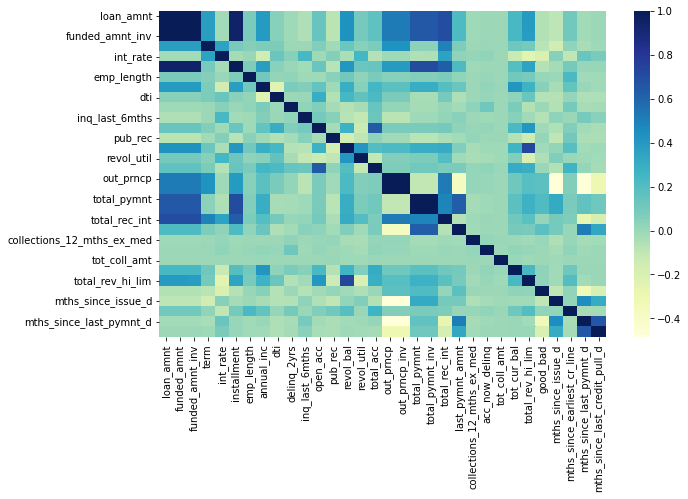

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df_num.corr(), annot=False, cmap='YlGnBu')
plt.savefig("num_corr.png")

Berdasarkan heat map, variabel yang memiliki korelasi tinggi adalah funded_amnt, funded_amnt_inv, out_prncp_inv dan total_pymnt_inv. Sehingga akan dikeluarkan dari model.

In [64]:
df_num.drop(columns = ['funded_amnt', 'funded_amnt_inv', 'out_prncp_inv', 'total_pymnt_inv'], inplace = True)

In [65]:
df.drop(columns = ['funded_amnt', 'funded_amnt_inv', 
                   'out_prncp_inv', 'total_pymnt_inv'], 
        inplace = True)

In [66]:
df_cat = df.select_dtypes(include = 'object').copy()
df_cat

,grade,home_ownership,verification_status,purpose,initial_list_status
42535,B,OWN,Verified,debt_consolidation,w
42536,C,RENT,Not Verified,debt_consolidation,f
42537,A,MORTGAGE,Not Verified,debt_consolidation,w
42538,B,RENT,Source Verified,debt_consolidation,w
42539,A,MORTGAGE,Not Verified,debt_consolidation,w
...,...,...,...,...,...
466278,D,RENT,Source Verified,vacation,f
466279,B,RENT,Source Verified,credit_card,w
466280,C,MORTGAGE,Source Verified,debt_consolidation,w
466281,D,MORTGAGE,Verified,debt_consolidation,f


Text(0.5, 1.0, 'Grade')

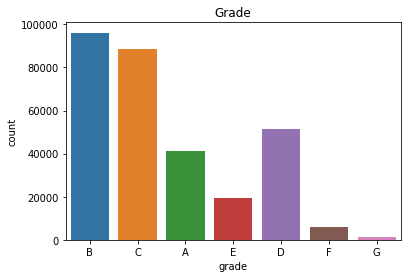

In [67]:
sns.countplot(data=df_cat, x='grade')
plt.title('Grade')

Text(0.5, 1.0, 'Home Ownership')

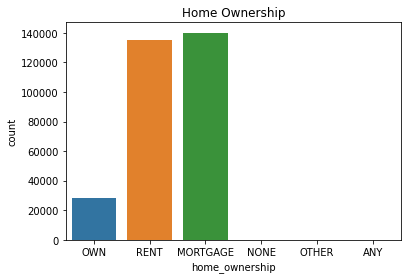

In [68]:
sns.countplot(data=df_cat, x='home_ownership')
plt.title('Home Ownership')

Text(0.5, 1.0, 'Verification Status')

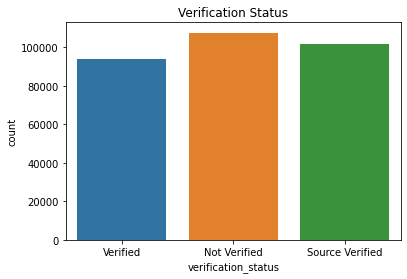

In [69]:
sns.countplot(data=df_cat, x='verification_status')
plt.title('Verification Status')

Text(0.5, 1.0, 'Purpose')

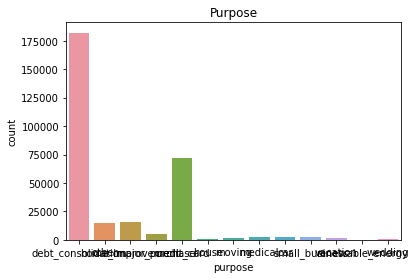

In [70]:
sns.countplot(data=df_cat, x='purpose')
plt.title('Purpose')

Text(0.5, 1.0, 'Initial List Status')

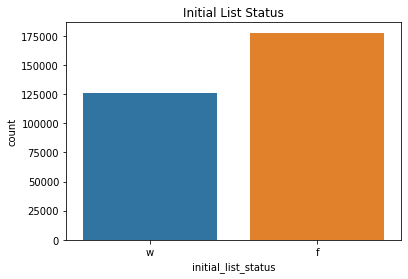

In [71]:
sns.countplot(data=df_cat, x='initial_list_status')
plt.title('Initial List Status')

## Handling Missing Value

In [72]:
df.isna().sum()

loan_amnt                            0
term                                 0
int_rate                             0
installment                          0
grade                                0
emp_length                       16192
home_ownership                       0
annual_inc                           0
verification_status                  0
purpose                              0
dti                                  0
delinq_2yrs                          0
inq_last_6mths                       0
open_acc                             0
pub_rec                              0
revol_bal                            0
revol_util                         154
total_acc                            0
initial_list_status                  0
out_prncp                            0
total_pymnt                          0
total_rec_int                        0
last_pymnt_amnt                      0
collections_12_mths_ex_med           0
acc_now_delinq                       0
tot_coll_amt             

In [73]:
# mengecek kolom x baris sebelum handling missing value
df.shape

(303593, 33)

In [74]:
# menghapus data yang memiliki missing value
df.dropna(inplace=True)
df.shape

(287009, 33)

In [75]:
# mengecek kembali apakah sudah tidak terdapat missing value atau tidak
df.isna().sum()

loan_amnt                        0
term                             0
int_rate                         0
installment                      0
grade                            0
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
purpose                          0
dti                              0
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       0
total_acc                        0
initial_list_status              0
out_prncp                        0
total_pymnt                      0
total_rec_int                    0
last_pymnt_amnt                  0
collections_12_mths_ex_med       0
acc_now_delinq                   0
tot_coll_amt                     0
tot_cur_bal                      0
total_rev_hi_lim                 0
good_bad            

sudah tidak terdapat missing value di semua variabel

# Feature Scaling & Encoding

## One Hot-Encoding

In [76]:
# Membuat variable dummy untuk variabel kategorikal

df_dummies = [pd.get_dummies(df['grade'], prefix = 'grade', prefix_sep = ':'),
              pd.get_dummies(df['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
              pd.get_dummies(df['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
              pd.get_dummies(df['purpose'], prefix = 'purpose', prefix_sep = ':'),
              pd.get_dummies(df['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':') ]


In [77]:
df_dummies = pd.concat(df_dummies, axis = 1)
type(df_dummies)

pandas.core.frame.DataFrame

In [78]:
df = pd.concat([df, df_dummies], axis = 1)

df.drop(['grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status'], axis=1, inplace=True)

In [79]:
df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
42535,27050,36,10.99,885.46,10.0,55000.0,22.87,0.0,0.0,14.0,...,0,0,0,0,0,0,0,0,0,1
42536,9750,36,13.98,333.14,1.0,26000.0,25.12,0.0,0.0,12.0,...,0,0,0,0,0,0,0,0,1,0
42537,12000,36,6.62,368.45,10.0,105000.0,14.05,0.0,1.0,12.0,...,0,0,0,0,0,0,0,0,0,1
42538,12000,36,13.53,407.40,10.0,40000.0,16.94,0.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
42539,15000,36,8.90,476.30,2.0,63000.0,16.51,0.0,0.0,8.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466278,10000,36,18.25,362.78,10.0,42000.0,11.57,0.0,0.0,9.0,...,0,0,0,0,0,0,1,0,1,0
466279,15000,36,13.53,509.25,4.0,66000.0,16.22,0.0,0.0,8.0,...,0,0,0,0,0,0,0,0,0,1
466280,18400,60,14.47,432.64,4.0,110000.0,19.85,0.0,2.0,18.0,...,0,0,0,0,0,0,0,0,0,1
466281,22000,60,19.97,582.50,10.0,78000.0,18.45,0.0,5.0,18.0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287009 entries, 42535 to 466284
Data columns (total 59 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            287009 non-null  int64  
 1   term                                 287009 non-null  int64  
 2   int_rate                             287009 non-null  float64
 3   installment                          287009 non-null  float64
 4   emp_length                           287009 non-null  float64
 5   annual_inc                           287009 non-null  float64
 6   dti                                  287009 non-null  float64
 7   delinq_2yrs                          287009 non-null  float64
 8   inq_last_6mths                       287009 non-null  float64
 9   open_acc                             287009 non-null  float64
 10  pub_rec                              287009 non-null  float64
 11  revol_bal

## Scaling Menggunakan MinMax Scaler

In [85]:
# melakukan normalisasi untuk kolom numerikal
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df[['loan_amnt']] = mm.fit_transform(df[['loan_amnt']])
df[['term']] = mm.fit_transform(df[['term']])
df[['int_rate']] = mm.fit_transform(df[['int_rate']])
df[['installment']] = mm.fit_transform(df[['installment']])
df[['emp_length']] = mm.fit_transform(df[['emp_length']])
df[['annual_inc']] = mm.fit_transform(df[['annual_inc']])
df[['dti']] = mm.fit_transform(df[['dti']])
df[['delinq_2yrs']] = mm.fit_transform(df[['delinq_2yrs']])
df[['inq_last_6mths']] = mm.fit_transform(df[['inq_last_6mths']])
df[['open_acc']] = mm.fit_transform(df[['open_acc']])
df[['pub_rec']] = mm.fit_transform(df[['pub_rec']])
df[['revol_bal']] = mm.fit_transform(df[['revol_bal']])
df[['revol_util']] = mm.fit_transform(df[['revol_util']])
df[['total_acc']] = mm.fit_transform(df[['total_acc']])
df[['out_prncp']] = mm.fit_transform(df[['out_prncp']])
df[['total_pymnt']] = mm.fit_transform(df[['total_pymnt']])
df[['total_rec_int']] = mm.fit_transform(df[['total_rec_int']])
df[['last_pymnt_amnt']] = mm.fit_transform(df[['last_pymnt_amnt']])
df[['collections_12_mths_ex_med']] = mm.fit_transform(df[['collections_12_mths_ex_med']])
df[['acc_now_delinq']] = mm.fit_transform(df[['acc_now_delinq']])
df[['tot_coll_amt']] = mm.fit_transform(df[['tot_coll_amt']])
df[['tot_cur_bal']] = mm.fit_transform(df[['tot_cur_bal']])
df[['total_rev_hi_lim']] = mm.fit_transform(df[['total_rev_hi_lim']])
df[['mths_since_issue_d']] = mm.fit_transform(df[['mths_since_issue_d']])
df[['mths_since_earliest_cr_line']] = mm.fit_transform(df[['mths_since_earliest_cr_line']])
df[['mths_since_last_pymnt_d']] = mm.fit_transform(df[['mths_since_last_pymnt_d']])
df[['mths_since_last_credit_pull_d']] = mm.fit_transform(df[['mths_since_last_credit_pull_d']])

In [86]:
df.head()

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
42535,0.766176,0.0,0.248754,0.623089,1.0,0.338107,0.571893,0.0,0.000000,0.245283,...,0,0,0,0,0,0,0,0,0,1
42536,0.257353,0.0,0.397807,0.223942,0.1,0.145850,0.628157,0.0,0.000000,0.207547,...,0,0,0,0,0,0,0,0,1,0
42537,0.323529,0.0,0.030907,0.249460,1.0,0.669584,0.351338,0.0,0.142857,0.207547,...,0,0,0,0,0,0,0,0,0,1
42538,0.323529,0.0,0.375374,0.277608,1.0,0.238663,0.423606,0.0,0.000000,0.113208,...,0,0,0,0,0,0,0,0,0,1
42539,0.411765,0.0,0.144566,0.327400,0.2,0.391143,0.412853,0.0,0.000000,0.132075,...,0,0,0,0,0,0,0,0,0,1


# Train-Test Split

In [156]:
X = df.drop('good_bad', axis = 1)
y = df['good_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [157]:
X_train, X_test = X_train.copy(), X_test.copy()

In [158]:
print(y.value_counts())

1    256038
0     30971
Name: good_bad, dtype: int64


In [161]:
y_test.value_counts()

1    64083
0     7670
Name: good_bad, dtype: int64

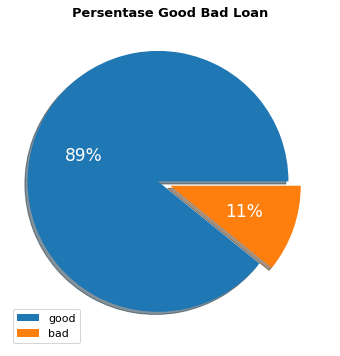

In [160]:
plt.figure(figsize = (12, 6))

plt.title('Persentase Good Bad Loan', size = 13, fontweight = 'bold', color = 'black')
labels = 'good', 'bad'
plt.pie(y.value_counts(), autopct = '%.0f%%', 
        textprops = {'color': 'w', 'fontsize': 17}, explode = (0.1,0), shadow = True)
plt.legend(labels, loc='lower left', fontsize = 11)

plt.savefig('y.png')
plt.show()

# Modelling

## Logistic Regression

In [179]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('Classification_Report: ')
print(classification_report(y_test, y_pred_lr))

Classification_Report: 
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      7670
           1       0.98      1.00      0.99     64083

    accuracy                           0.98     71753
   macro avg       0.98      0.90      0.93     71753
weighted avg       0.98      0.98      0.97     71753



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Area under ROC Curve:  0.8961045375455368 


Text(0.5, 1.0, 'ROC Curve')

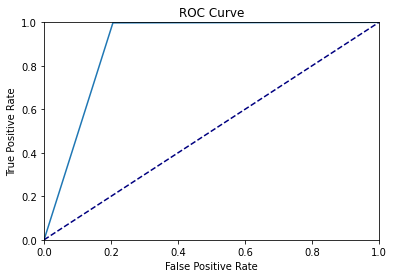

In [180]:
roc_auc = roc_auc_score(y_test, y_pred_lr)
print("Area under ROC Curve: ",roc_auc,"" )

fpr, tpr, _ = roc_curve(y_test, y_pred_lr)
plt.plot(fpr, tpr, label = 'auc = ' + str(roc_auc))
plt.plot([0, 1], [0,1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


In [166]:
lr.fit(X / np.std(X, 0), y)
importance_lr = pd.DataFrame(data={
    'feature': X_train.columns,
    'importance': lr.coef_[0]
})
importance_lr = importance_lr.sort_values(by='importance', ascending=False)
importance_lr.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,feature,importance
15,total_pymnt,19.355455
14,out_prncp,14.243698
17,last_pymnt_amnt,12.216939
26,mths_since_last_credit_pull_d,1.247823
56,initial_list_status:f,0.257514
20,tot_coll_amt,0.249550
57,initial_list_status:w,0.248308
35,home_ownership:MORTGAGE,0.231539
31,grade:E,0.218675
39,home_ownership:RENT,0.197426


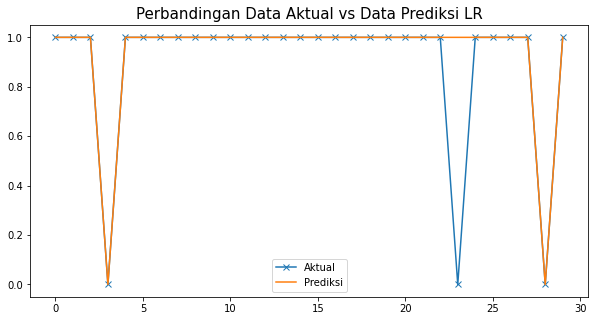

In [187]:
plt.figure(figsize=(10,5))
plt.plot(y_test[:30].values, label='Aktual', marker="x")
plt.plot(y_pred_lr[:30], label='Prediksi')
plt.title('Perbandingan Data Aktual vs Data Prediksi LR', fontsize=(15))
plt.legend()

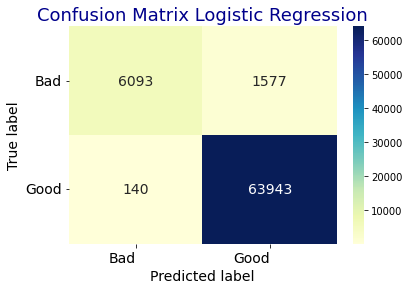

In [193]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_lr)), ('Bad', 'Good'), ('Bad', 'Good'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix Logistic Regression', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

## XGBoost 

In [182]:
# xgboost classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Classification_Report: ')
print(classification_report(y_test, y_pred_xgb))

Classification_Report: 
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      7670
           1       0.99      1.00      1.00     64083

    accuracy                           0.99     71753
   macro avg       0.99      0.97      0.98     71753
weighted avg       0.99      0.99      0.99     71753



Area under ROC Curve:  0.9749739606968725 


Text(0.5, 1.0, 'ROC Curve')

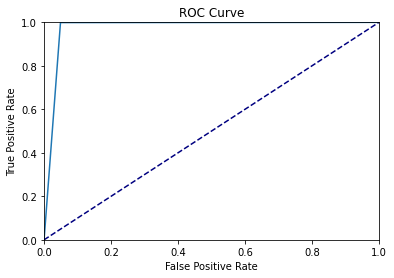

In [183]:
roc_auc = roc_auc_score(y_test, y_pred_xgb)
print("Area under ROC Curve: ",roc_auc,"" )

fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
plt.plot(fpr, tpr, label = 'auc = ' + str(roc_auc))
plt.plot([0, 1], [0,1], color = 'navy', linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')


In [172]:
# Feature Importance

importance_xgb = pd.DataFrame(data={
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
})
importance_xgb = importance_xgb.sort_values(by='importance', ascending=False)
importance_xgb.head(10)

,feature,importance
17,last_pymnt_amnt,0.472253
25,mths_since_last_pymnt_d,0.143938
23,mths_since_issue_d,0.121708
3,installment,0.056270
15,total_pymnt,0.054184
0,loan_amnt,0.044373
16,total_rec_int,0.041694
26,mths_since_last_credit_pull_d,0.033694
14,out_prncp,0.027253
2,int_rate,0.002996


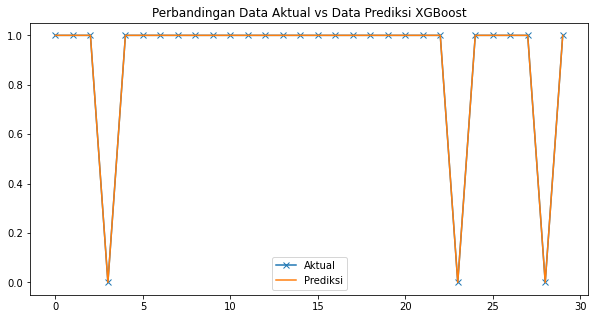

In [188]:
# Plot 

plt.figure(figsize=(10,5))
plt.plot(y_test[:30].values, label='Aktual', marker="x")
plt.plot(y_pred_xgb[:30], label='Prediksi')
plt.title('Perbandingan Data Aktual vs Data Prediksi XGBoost')
plt.legend()

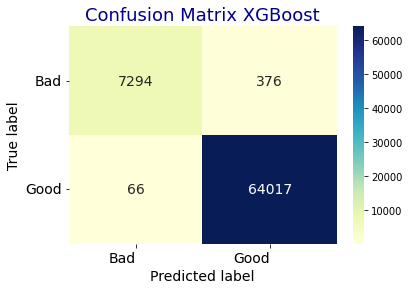

In [192]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_pred_xgb)), ('Bad', 'Good'), ('Bad', 'Good'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix XGBoost', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()